# Assignment 10

#### The assignment focuses on what you have learned in the Unsupervised Machine Learning notes. Use the following link to source your data for the exercise on Sales Conversion Optimization: https://www.kaggle.com/loveall/clicks-conversion-tracking.

File Description

This project contains data from an  organisation’s social media ad campaign. Within the file conversion_data.csv contains 11 variables and 1143 observations. 

Variables include:
1. ad_id
2. xyz_campaign_id
3. fb_campaign_id
4. age
5. gender
6. interest
7. Impressions
8. Clicks
9. Spent
10. Total_Conversion
11. Approved_Conversion

In [1]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt


#### 1. Import the libraries and load the data.

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 1687-5630

 Directory of C:\Users\Suhaam

07/03/2021  11:43    <DIR>          .
07/03/2021  11:43    <DIR>          ..
23/10/2018  21:30    <DIR>          .android
20/10/2018  23:25    <DIR>          .AndroidStudio3.0
25/06/2018  10:58    <DIR>          .AndroidStudio3.1
20/10/2018  18:59    <DIR>          .AndroidStudio3.2
13/01/2021  15:16    <DIR>          .atom
17/01/2021  18:40               302 .bash_history
16/01/2019  23:01    <DIR>          .BestSoft
05/03/2021  01:29    <DIR>          .conda
04/03/2021  12:45                43 .condarc
20/06/2018  12:44    <DIR>          .cordova
14/01/2019  17:00    <DIR>          .dotnet
23/10/2018  02:19                16 .emulator_console_auth_token
19/01/2019  20:32               178 .gitconfig
13/01/2021  15:00                 0 .gitignore
25/06/2018  11:15    <DIR>          .gradle
13/01/2021  13:37    <DIR>          .idlerc
07/03/2021  11:06    <DIR>          .ipynb_checkpoints
26

In [4]:
df = pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### 2. Dummy encode any categorical or object values in the data and save the resulting data frame to variable X

In [9]:
X = pd.get_dummies(df, columns = ['age', 'gender'])

In [12]:
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


#### 3. Using a heat map to show the correlation in the data.

 a. Drop the first 4 columns in the data frame X.

In [26]:
X.shape

(1143, 15)

In [28]:
X1 = X.drop(['age_35-39','age_40-44','age_45-49','gender_F'], axis = 1)

In [29]:
X1.head().reset_index()

,index,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,gender_M
0,0,708746,916,103916,15,7350,1,1.43,2,1,1,1
1,1,708749,916,103917,16,17861,2,1.82,2,0,1,1
2,2,708771,916,103920,20,693,0,0.00,1,0,1,1
3,3,708815,916,103928,28,4259,1,1.25,1,0,1,1
4,4,708818,916,103928,28,4133,1,1.29,1,1,1,1


b. Basing your answer on what can be seen in the heat map, why did we drop these columns?

In [30]:
cor = X.corr()

<AxesSubplot:>

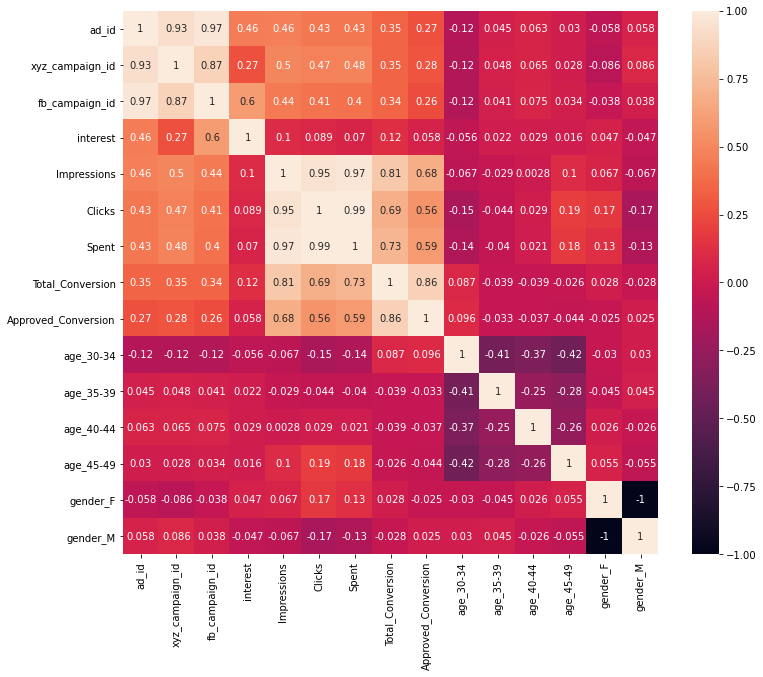

In [31]:
#using heatmap

plt.figure(figsize = (12,10))
sns.heatmap(cor, annot = True)


We dropped these columns because the following features:
- age_35-39
- age_40-44
- age_45-49
- gender_F 

all display a negative correlation. Thus, making Approved_Conversion the target column. 

#### 4. Using the elbow method:
a. Determine the best number of clusters for the data in the range of 2 to 20.

In [32]:
from sklearn.cluster import KMeans

In [36]:
%%time
wcss = []

Wall time: 0 ns


In [37]:
%%time
wcss = []
for i in range(2,20):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

Wall time: 4.86 s


[72217755183665.9,
 33345016849966.29,
 22205443615260.086,
 15274054437566.986,
 12265769309088.258,
 10202007903563.951,
 7710260165762.95,
 6141678977719.9795,
 5189650070449.467,
 4583502695221.464,
 4059747135661.4614,
 3498796883867.3867,
 3159462264043.734,
 2821088314798.5723,
 2513074094537.7803,
 2343904102359.526,
 2000510992722.3262,
 1757564318798.6077]

In [38]:
wcss = np.array(wcss)
dif_scores = wcss/wcss[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores<np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

15


b. Also include the graphical plot for the elbow curve.

Text(0, 0.5, 'Within Clusters Sum of Squares')

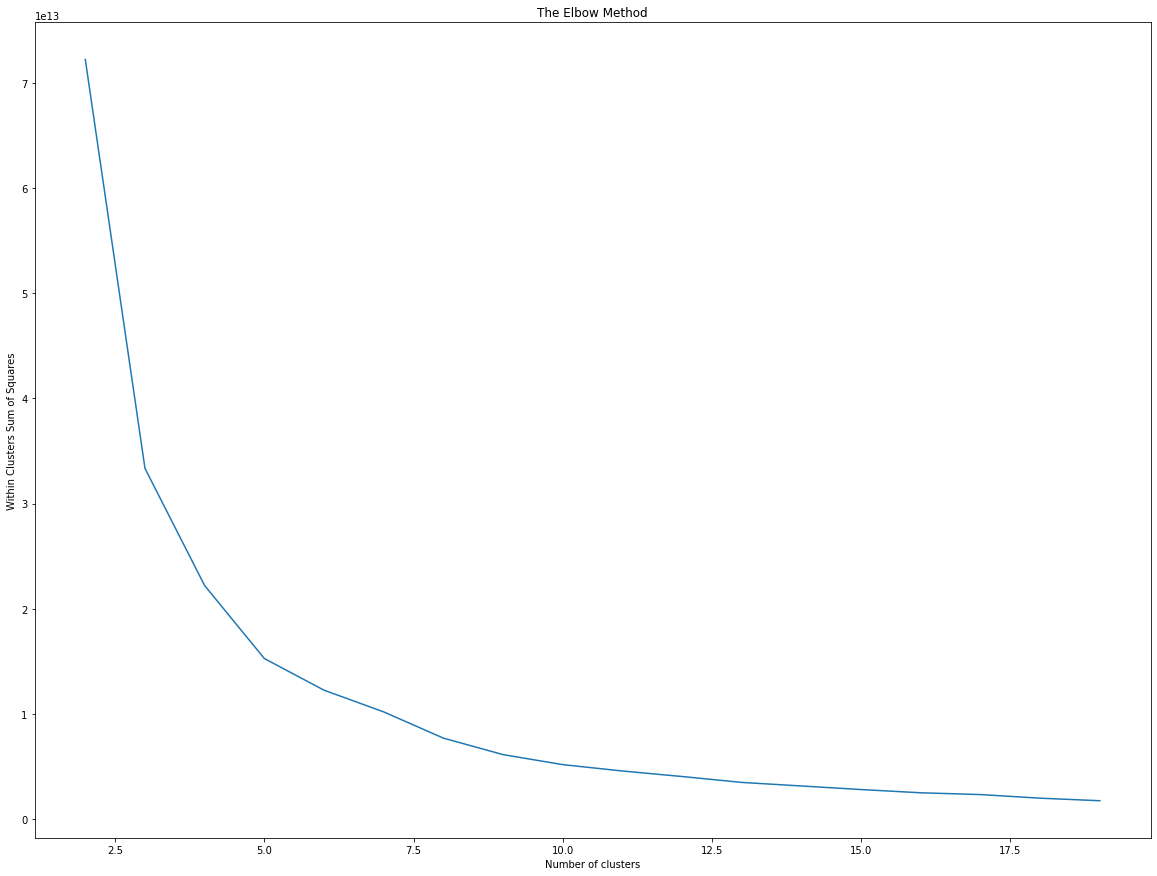

In [41]:
number_clusters = range(2,20)
plt.figure(figsize = (20,15))
plt.plot(number_clusters,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within Clusters Sum of Squares")

#### 5. Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

In [43]:
X.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.372703,0.216973,0.183727,0.226597,0.482065,0.517935
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.483736,0.412364,0.387431,0.418813,0.499897,0.499897
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'Impressions',
       'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion',
       'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49', 'gender_F',
       'gender_M'],
      dtype='object')

In [58]:
km = KMeans(n_clusters)

xfeatures = X[['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'Impressions',
       'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion',
       'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49', 'gender_F',
       'gender_M']]
km

KMeans(n_clusters=15)

In [71]:
clusters = km.fit_predict(xfeatures)
clusters

array([ 2,  2,  2, ...,  9, 10,  3])

In [72]:
km.fit(xfeatures)

KMeans(n_clusters=15)

In [77]:
km.labels_

array([ 4,  4,  4, ...,  8, 11, 13])

In [84]:
clusters is km.labels_

False

In [88]:
clusters = df['cluster_labels'] 
df.head()


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cluster_labels
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,2
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,2
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,2
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,2
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,2


#### 6. Use the model to predict the labels from the data and save them to variable y_means.

In [89]:
y_means = df['cluster_labels']
y_means

0        2
1        2
2        2
3        2
4        2
        ..
1138     1
1139    10
1140     9
1141    10
1142     3
Name: cluster_labels, Length: 1143, dtype: int32

In [117]:
y_means = pd.get_dummies(df, columns = ['cluster_labels', 'ad_id'])
y_means.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,...,ad_id_1314405,ad_id_1314406,ad_id_1314407,ad_id_1314408,ad_id_1314409,ad_id_1314410,ad_id_1314411,ad_id_1314412,ad_id_1314414,ad_id_1314415
0,916,103916,30-34,M,15,7350,1,1.43,2,1,...,0,0,0,0,0,0,0,0,0,0
1,916,103917,30-34,M,16,17861,2,1.82,2,0,...,0,0,0,0,0,0,0,0,0,0
2,916,103920,30-34,M,20,693,0,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,916,103928,30-34,M,28,4259,1,1.25,1,0,...,0,0,0,0,0,0,0,0,0,0
4,916,103928,30-34,M,28,4133,1,1.29,1,1,...,0,0,0,0,0,0,0,0,0,0
